<h1>Topic : </h1>
<h2><br> Study of Awarded Japanese Restaurant Behavior in Hong Kong through Analysis of Data from “Openrice.com” 
<br>-Seeking for Attributes or Tangible Characteristic of a Successful Japanese Restaurant </h2>
<h5>Originally a Project for MSc in Engineering Entreprise Management <br></h5>

## Introduction

Similar to "Yelp" or "thefork" in UK, “Openrice.com” is an online platform for restaurnat's review and information exchange, and it is the most prominent and widely acclaimed gastronomic guide in Hong Kong. This Project aimed to provide some insight to the optimal Japnaese restaurnat operating strategy in Hong Kong through performing data analysis on the data crawled and parsed on the website, such as the customer reviews, price ranges and locations of the restaurant.


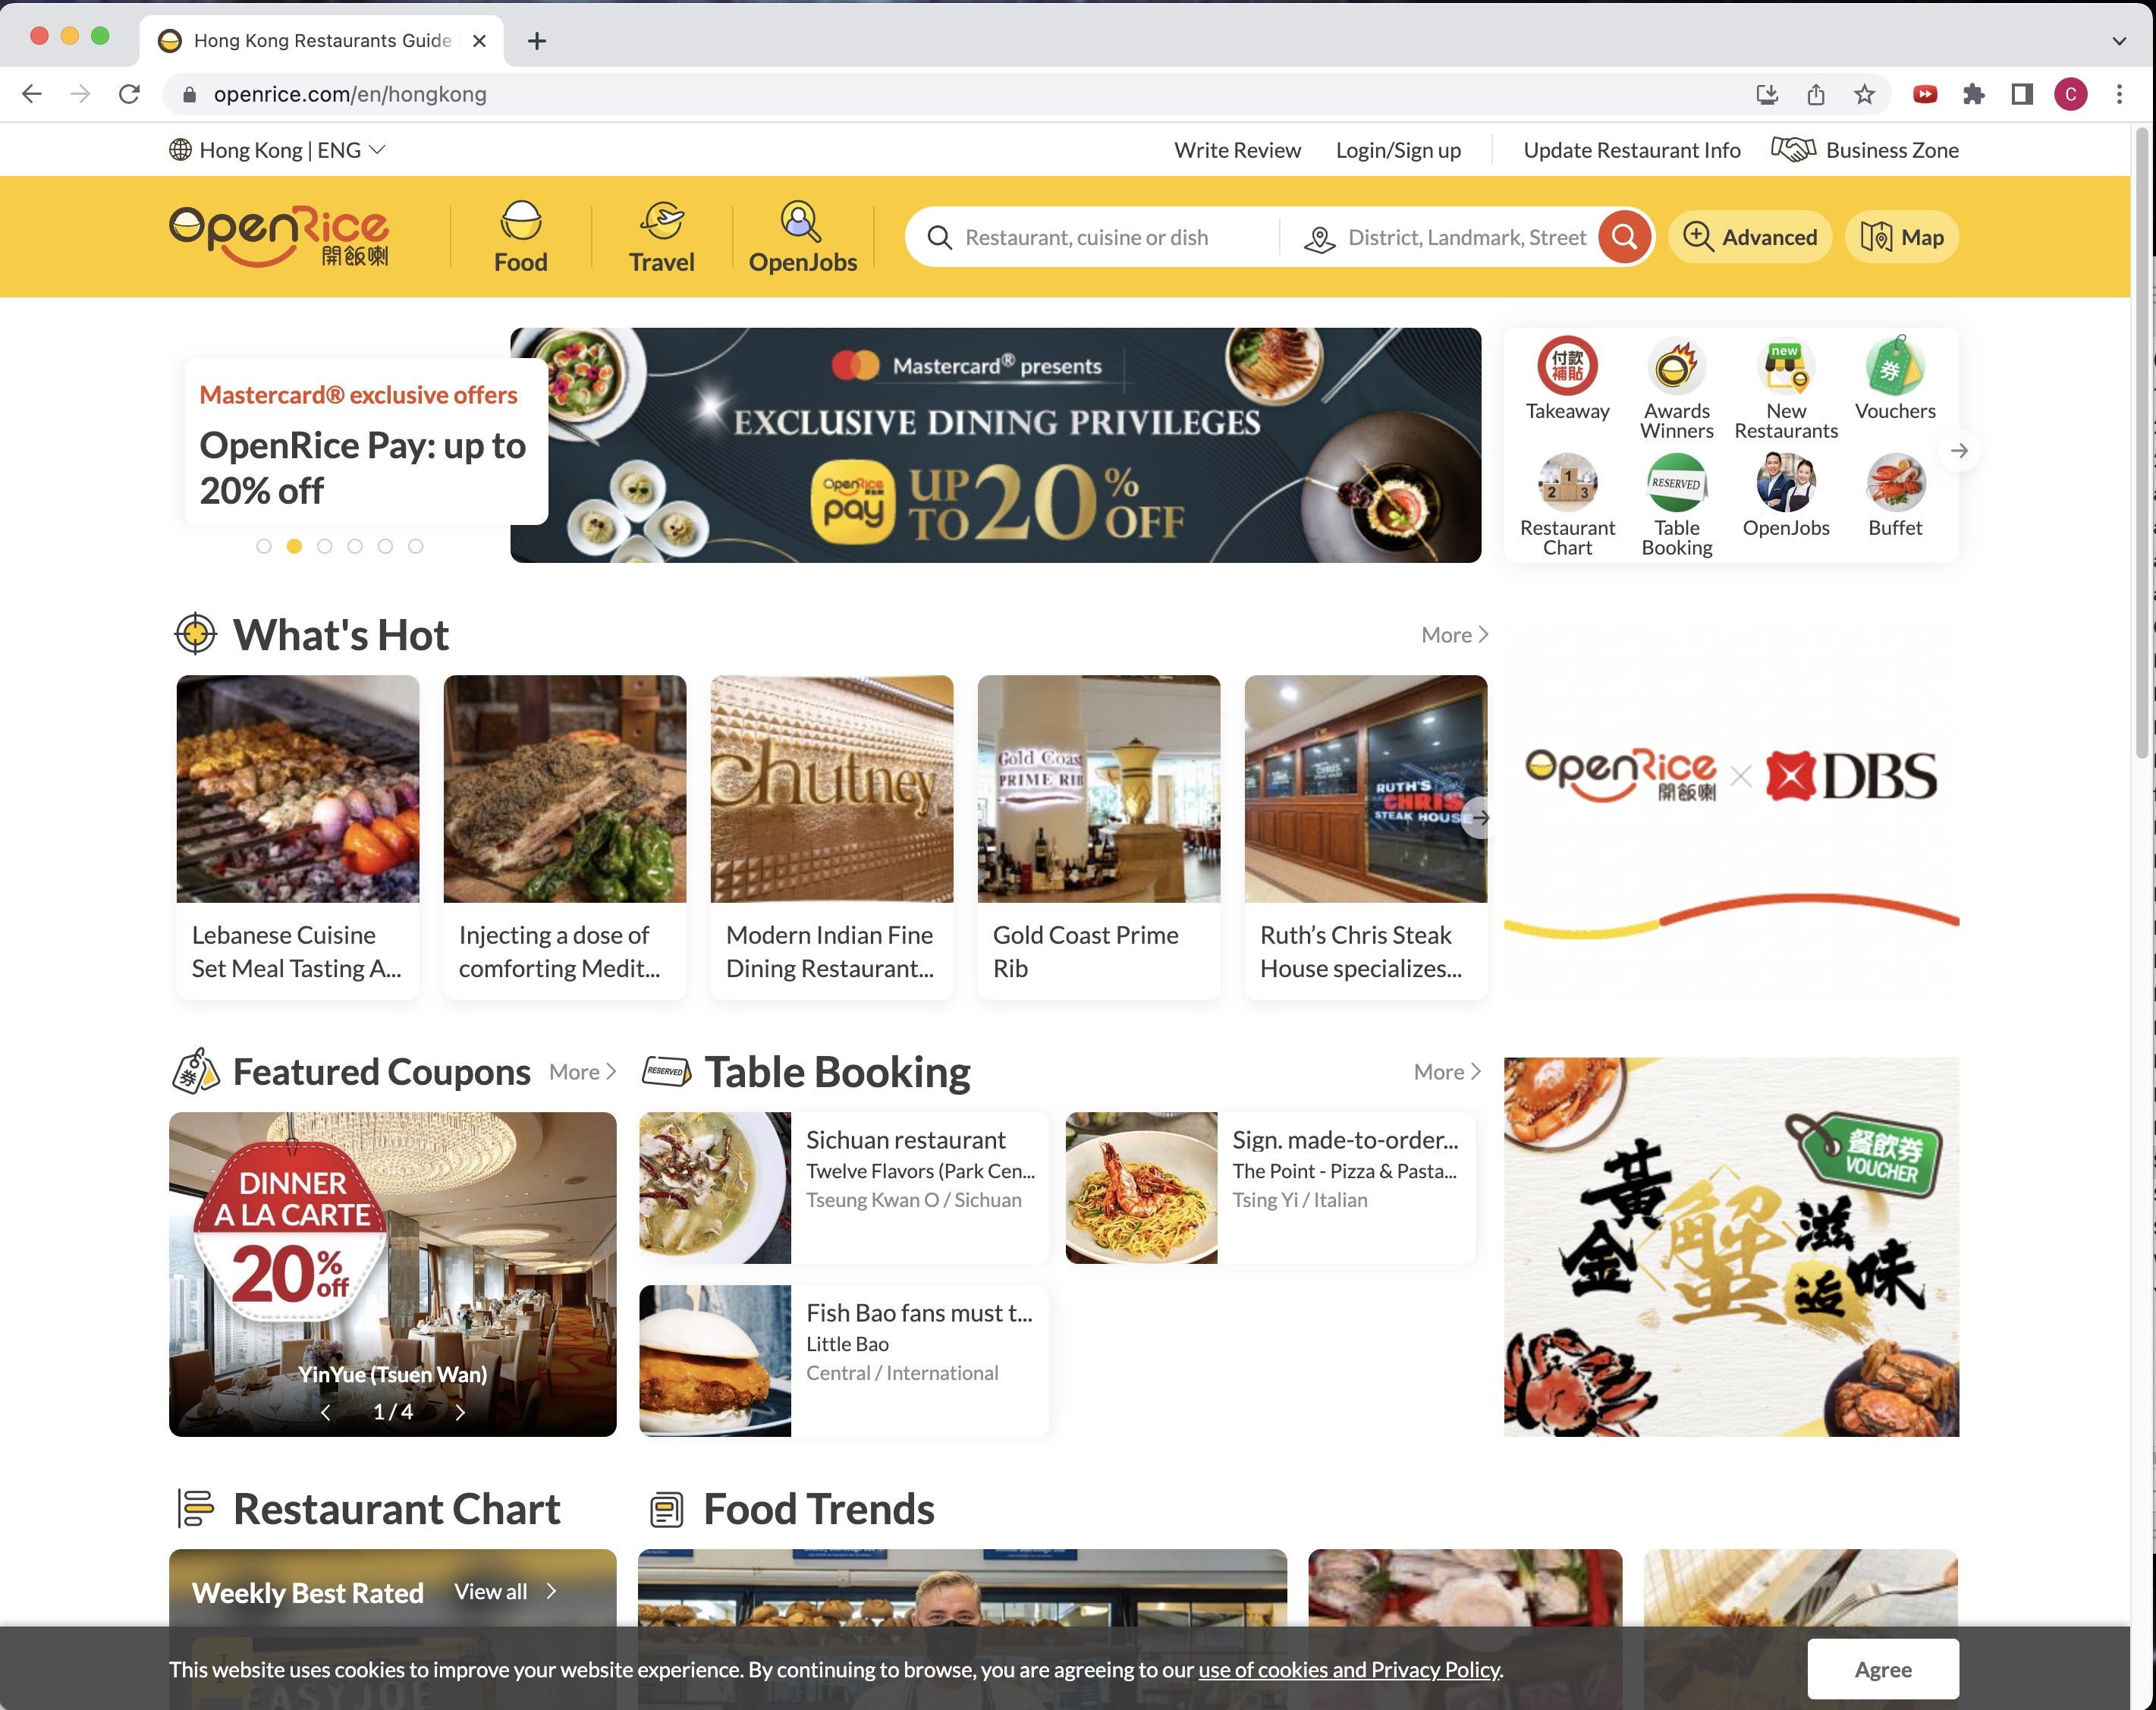
Front page of "openrice.com"

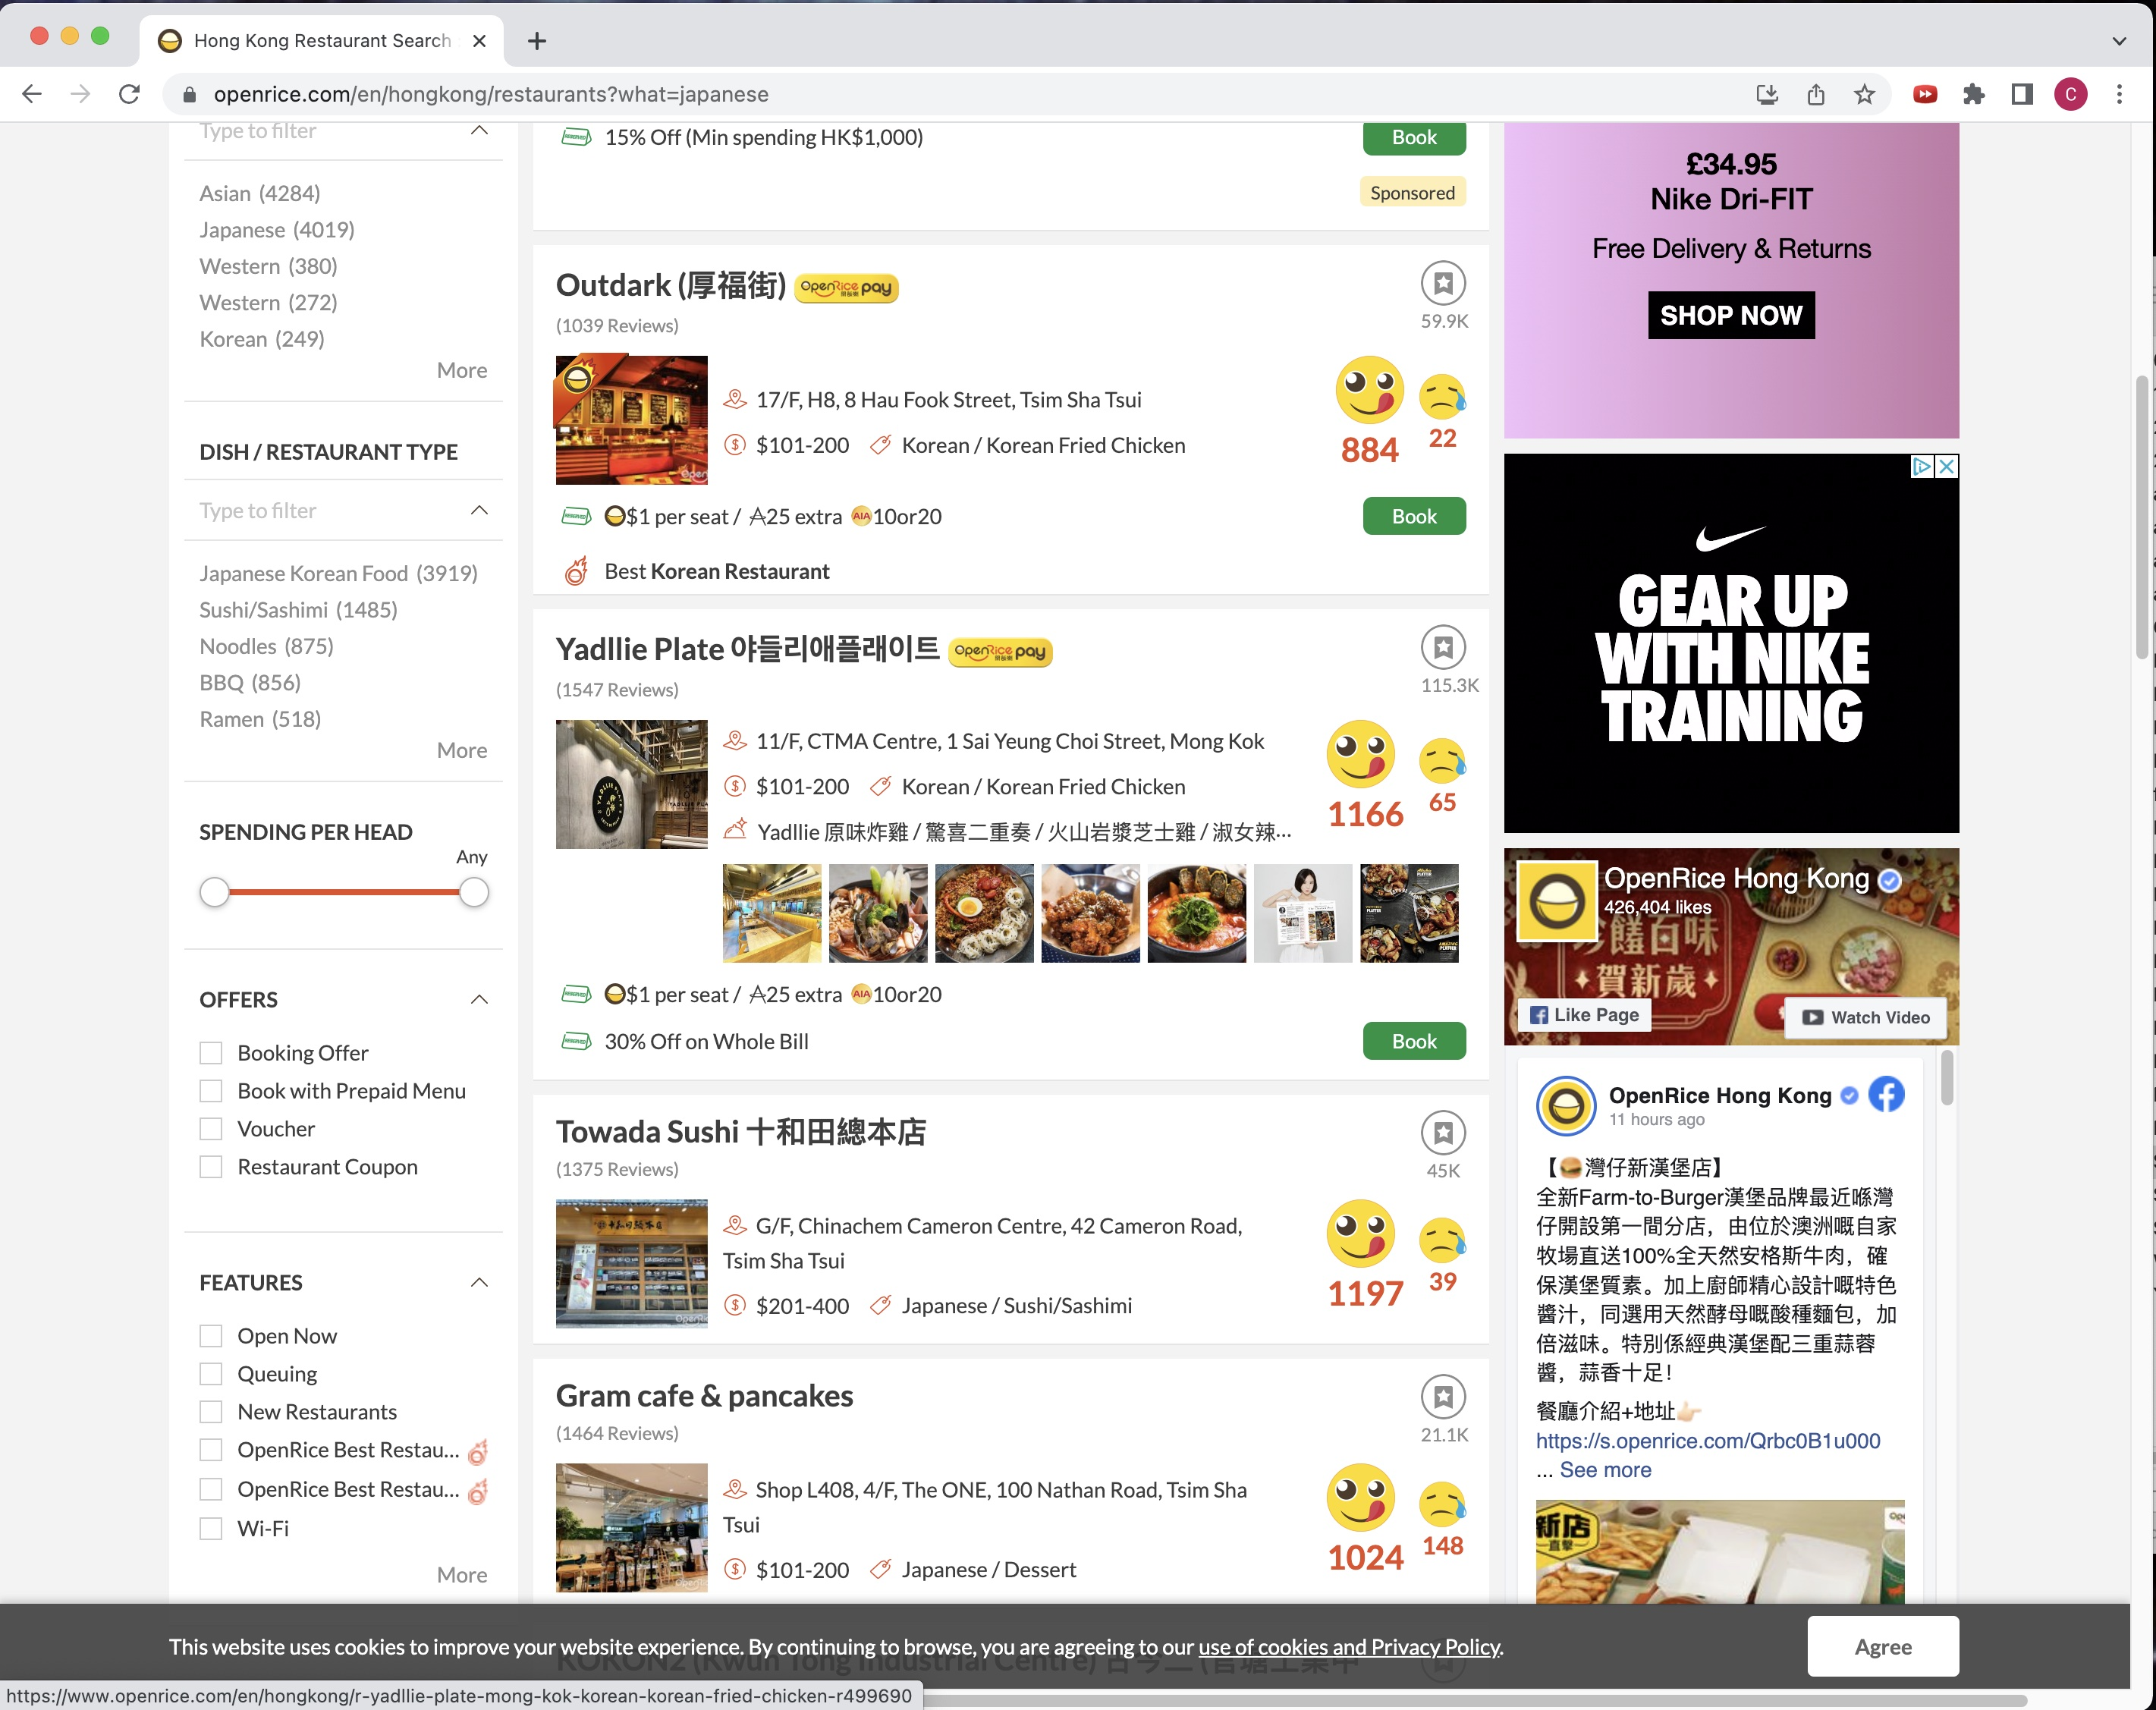
general layout of "openrice.com"

## Hypothesis: 
There are certain criteria that would make a Japanese restaurant more likely to be successful or sustainable in Hong Kong. 

It is considered that the number of net positive feedbacks, bookmarks and price ranges are closely related to how successful or, at least , how popular one restaurant is. And respectively, there should be some traits possessed by the majority of successful restaurants such as location and type of food they served.


<h3> Methodology and Analytical Tools Use: </h3>

The project is divided into four parts:

<b>1.   	Web Crawling and Parsing </b>

Python code with BeautifulSoup library was developed to crawl and parse the information such as the location, number of good reviews and ratio of positive to negative review, genres of all the Japanese restaurants in Hong Kong.The data would be organized and processed through the Panda dataframe for further analysis. 

<b>2.   	Graphical informatics and Data Cleaning </b>

Data cleaning would be conducted from the data crawled from the website. Hence, various graphical illustrations such as histogram and relational plot would be adopted to visualise the distribution of different locations , price range and type of japanes restaurant, as well as inspecting any visable relationship between the data between conducting data analysis.

<b>3.   	Clustering and Classification </b>

The number of net positive reviews, bookmarks and the price range are plotted on a 2D graph by dimensionality reduction using PCA, followed by knn clustering method to check whether the awarded restaurant can be identified with the grouping on the PCA graph.  

<b>4.   	Decision Tree</b>

With the result from clustering, the dataset of restaurants is partitioned into two groups, namely “Awarded" and ”Normal”. The area and food type data of the restaurants were used as the attribute for the leaf node and develop a decision tree which can help estimating whether it is a restaurant with higher chance of getting awarded.

---

## Content
### 1.   	Web Crawling and Parsing

In the first part of this project, the information of all the Japanese Restaurant were crawled and parsed from the prominent and widely  acclaimed gastronomic guide in Hong Kong ,”Openrice.com”. 

Firstly we are installing and importing all the necessary libraries for the python notebook.


In [43]:
!pip install requests
!pip install bs4
!pip install folium
!pip install geopy

In [44]:
#importing necessary library 

import requests #for making http request
from bs4 import BeautifulSoup #for parsing html script and converting them into python object
import pandas as pd #for data manipulation 
from geopy.geocoders import Nominatim #from geopy.geocoders import Nominatim #Python client for geocoding web service
import numpy as np # NumPy is a library working for array
import matplotlib.pyplot as plt #for ploting graphs
import seaborn as sns # Import seaborn library for ploting graphs
import sklearn # Import machine learning library
from sklearn import datasets, preprocessing
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split #split array into random train and test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report # for decision tree analysis
from sklearn import linear_model  # for linear regression

In [45]:
#Send http request to openrice.com with particular parameters
page = requests.get("https://www.openrice.com/en/hongkong/restaurants/cuisine/japanese",headers={'User-Agent': 'Chrome/51.0.2704.103'})

#Checking the response status code (200 - Successful request)
print("Status code: " + str(page.status_code))

Status code: 200


<i>When trying to search for all the entries of japanese restaurants on the site,it is noted that that the openrice search result only allow 17 pages of results, far less than enough to show majority of the japanese restaurant around hong kong, hence, it is important to refine the search criteria to obatin more results and it is achieved by extracting all the district code to refine the search result for each area of hong kong.</i>

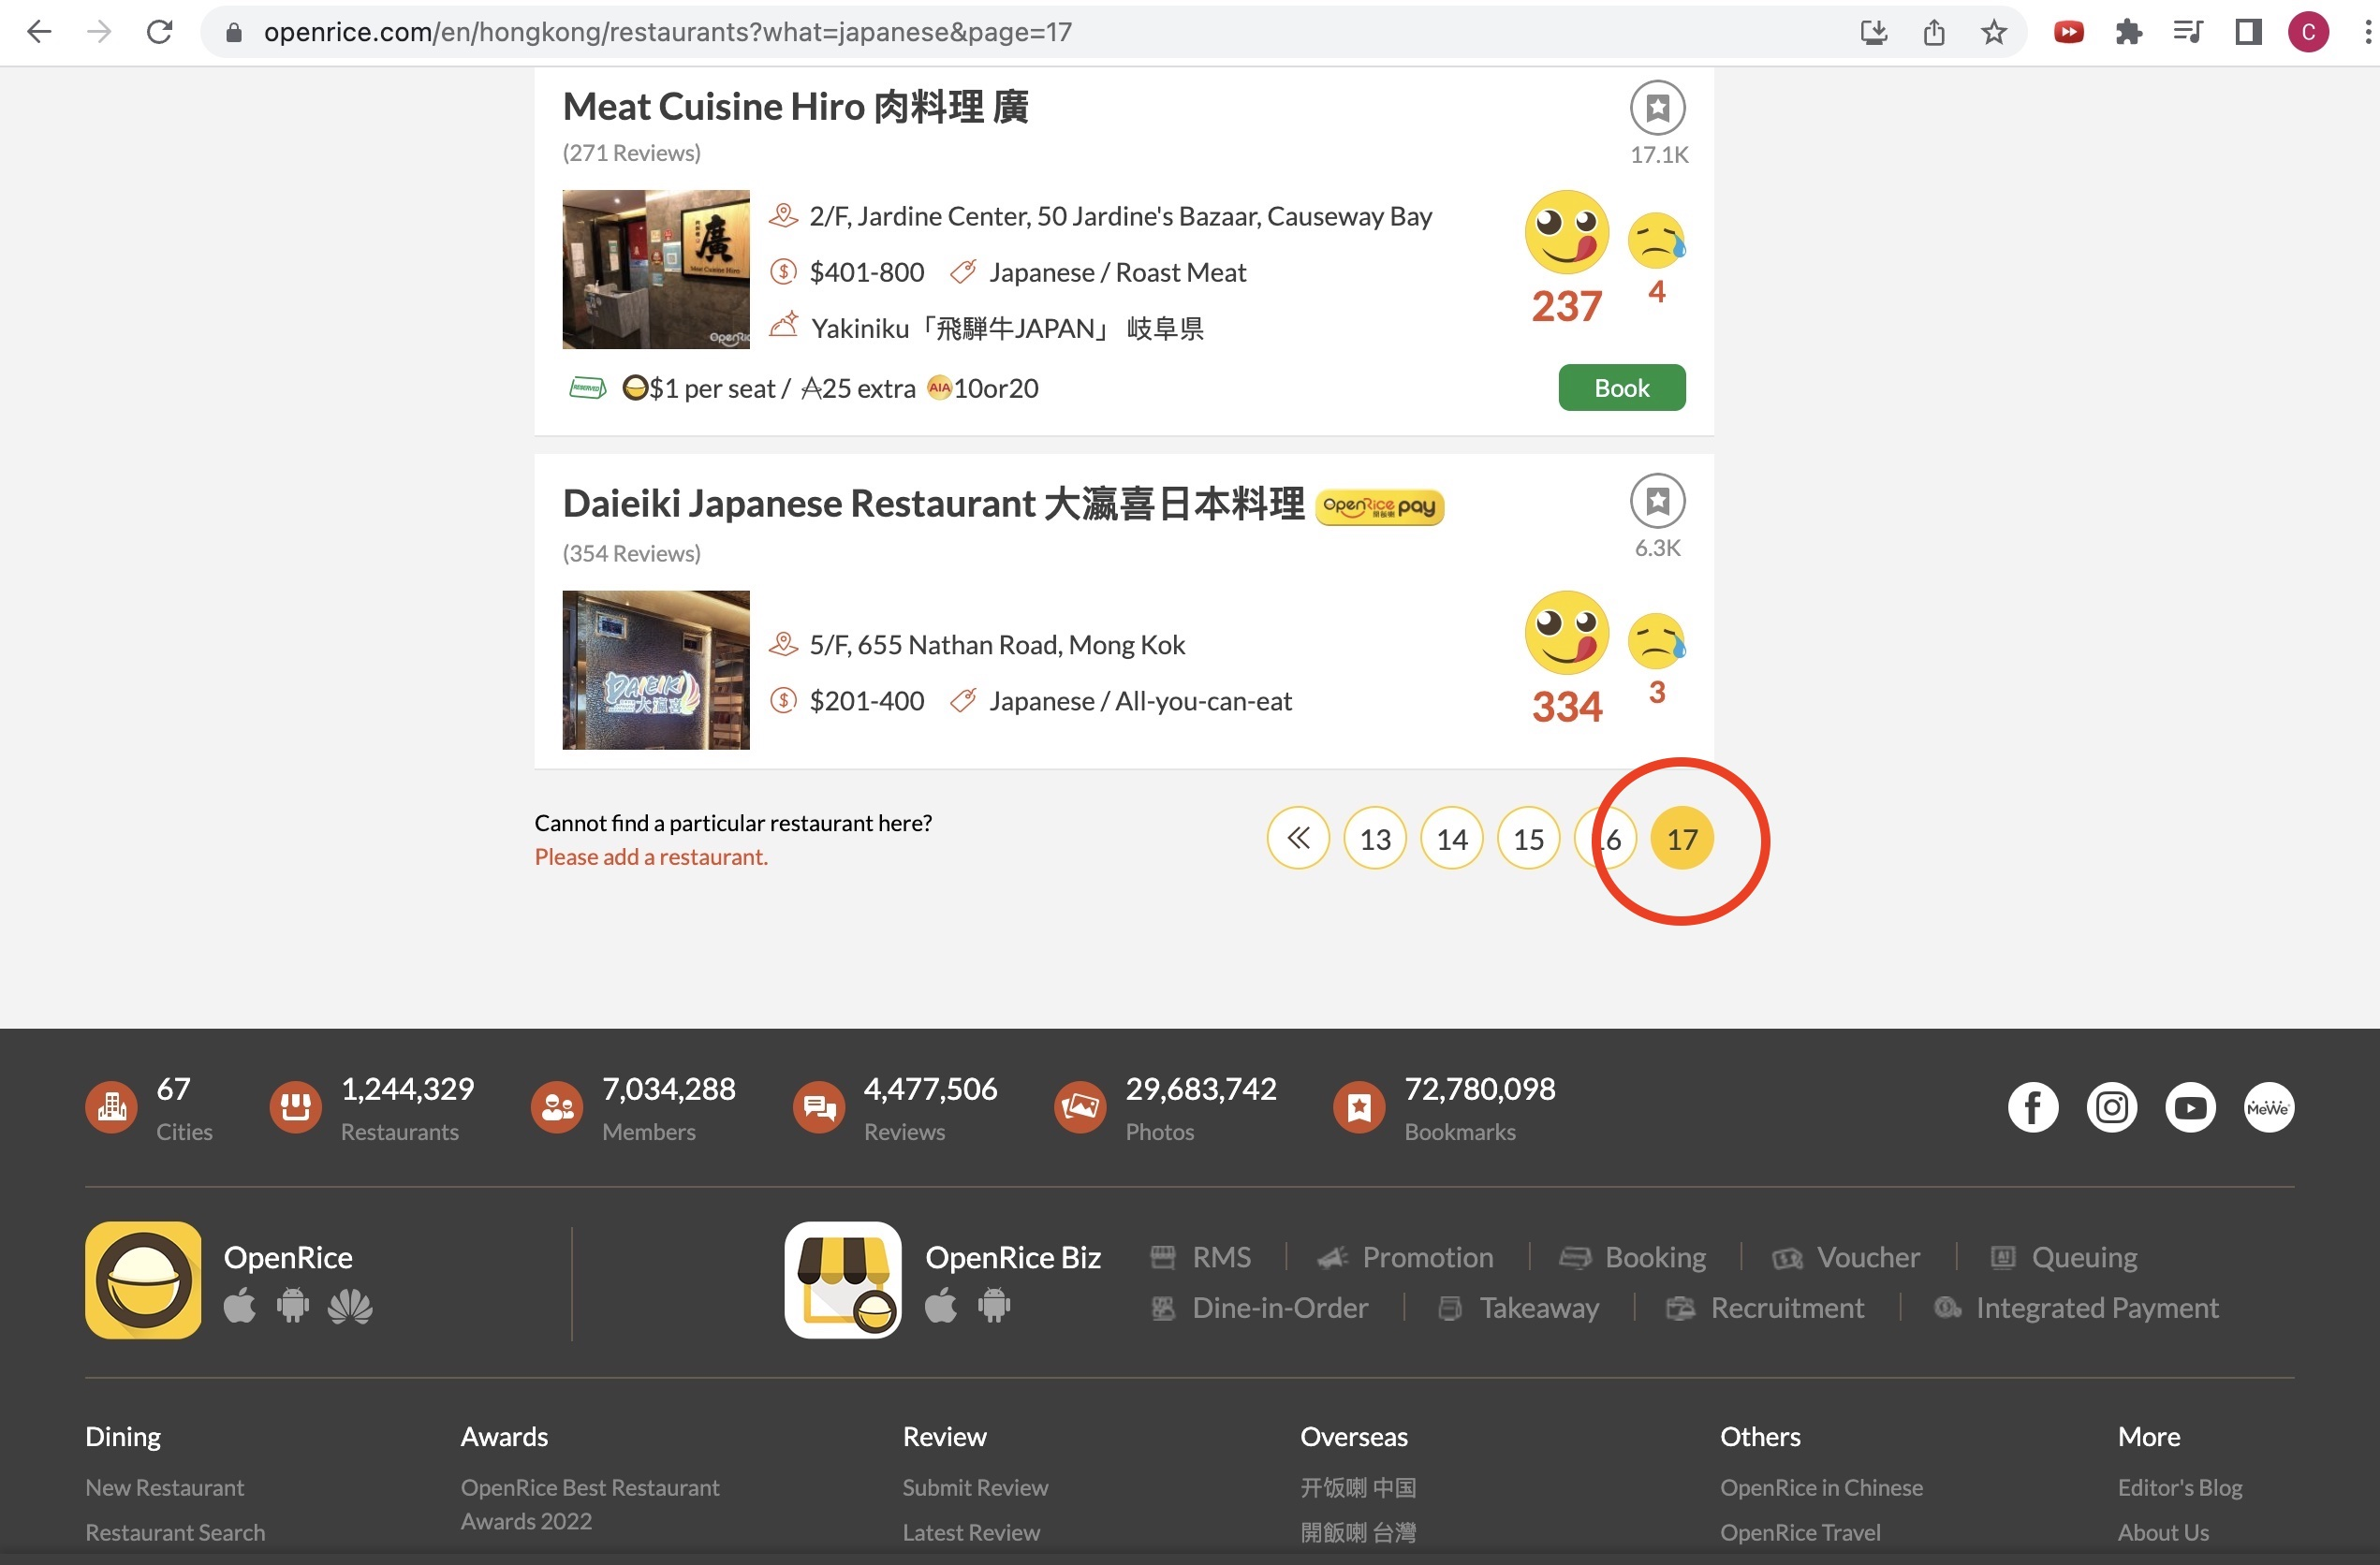

In [46]:
#Use beautifulsoup package to extract targeted information
soup = BeautifulSoup(page.content, "html.parser")


In [47]:
pilotpage = requests.get("https://www.openrice.com/en/hongkong/restaurants/cuisine/japanese",headers={'User-Agent': 'Chrome/51.0.2704.103'})
print("Status code: " + str(pilotpage.status_code))

results= soup.find_all('li', class_="dropdown-section-content-container-options-item js-dropdown-section-content-container-options-item js-filter-tag-item")
results[1]['data-tag']

Status code: 200


'Hong Kong Island'

In [48]:
# finding the district code in Openrice

pilotpage = requests.get("https://www.openrice.com/en/hongkong/restaurants/cuisine/japanese",headers={'User-Agent': 'Chrome/51.0.2704.103'})
print("Status code: " + str(pilotpage.status_code))

results= soup.find_all('li', class_="dropdown-section-content-container-options-item js-dropdown-section-content-container-options-item js-filter-tag-item")
results[1]

DistrictCode1=[]

for district in results:

        districtID=district['data-param']
        datatag=district['data-tag']
        datacount=district['data-count'] #total number of restaurants belongs to the districtID
        
        
        if districtID.startswith("districtId")==1:
            info={
                "DistrictID":districtID,
                "DataTag":datatag,
                "DataCount":datacount
            }
            DistrictCode1.append(info)
        
DistrictCode1;

# Plus, by insepecting the page, the crusineID for Japanese Food is 2009, 
# Both the DistrictID and crusine ID would be put into the search result url

Status code: 200


In [49]:
#Check the length of Districtcode
len(DistrictCode1)

92

In [50]:
# Function for parsing the information of each japanese restaurant

def extract_page(url):
    
    page=requests.get(url,headers={'User-Agent': 'Chrome/51.0.2704.103'})
    print("Status code: " + str(page.status_code))
    soup = BeautifulSoup(page.content, "html.parser")

    results= soup.find_all('div', class_="content-cell-wrapper")
    Resto=[]

    for resto in results:

        title=resto.find('h2',class_="title-name")
        Title=""
        if title !=None:
            Title=title.text.strip()
            
        area=resto.find('div',class_="icon-info address").a
        Area=""
        if area !=None:
            Area=area.text
        
        location=resto.find('div',class_="icon-info address").find("span")
        Location=""
        if location !=None:
            Location=location.text.strip()
            
        reviewcount=resto.find('div',class_="subtitle-wrapper pois-restaurant-list-cell-top-info").find("span")
        ReviewCount=""
        if reviewcount !=None:
            ReviewCount=reviewcount.text.strip() 
            
        bookmarks=resto.find('div',class_="text bookmarkedUserCount js-bookmark-count")
        Bookmarks=""
        if bookmarks !=None:
            Bookmarks=bookmarks["data-count"]

        Po_review= resto.find('span',class_="score score-big highlight")
        PositiveReview=""
        if Po_review != None:
            PositiveReview=Po_review.text
        
        N_review= resto.find('span',class_="score highlight")
        NegReview=""
        if N_review != None:
            NegReview=N_review.text
            
        pricerange=resto.find('div',class_="icon-info icon-info-food-price").find('span')
        PriceRange=""
        if pricerange !=None:
            PriceRange=pricerange.text
            
        Catergory=resto.find('ul',class_="pois-categoryui-list").find_all(["li"])
        
        Genre=[Cat.string for Cat in Catergory]
        #print (Title,Area,Location,Bookmarks,PosReview,NegReview,PriceRange,Genre)

        # the data parse for each restaurant
        info={
            "Title":Title,
            "Area":Area,
            "Location":Location,
            "Bookmarks":Bookmarks,
            "Positive Review":PositiveReview,
            "Negative Review":NegReview,
            "Review Count":ReviewCount,
            "PriceRange":PriceRange,
            "Genre":Genre}

        Resto.append(info)
        
    Resto=pd.DataFrame(Resto)
    return Resto

In [51]:
'''
checking the total number of pages,
since every page return 15 searches results, 
the total number of pages = total counts of each search criteria / 15
'''
#Create a empyt list to store dataframe for each page
pages = []
Totalpages=0 
# to find out the total number of pages to crawl
for i in range(len(DistrictCode1)) :
    end_page= min(int(int(DistrictCode1[i]["DataCount"])/15)+1,17)
    for num in range(1, end_page+1):
        Totalpages+=1
print("total number of pages:",Totalpages)

total number of pages: 368


In [70]:
#Parsing all the data to final_data
count=0
for i in range(len(DistrictCode1)):
    end_page= min(int(int(DistrictCode1[i]["DataCount"])/15)+1,17)
    print (end_page)
    for num in range(1, end_page+1):
        print("Extracting page :"+str(DistrictCode1[i]["DistrictID"]+"page:"+str(num)))
        url = "https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&"+str(DistrictCode1[i]["DistrictID"])+"&page="+str(num)
        a=a+1
        print (url,count)
        pages.append(extract_page(url))
#Combine the dataframes of all pages
final_data = pd.concat(pages, ignore_index=True)

17
Extracting page :districtId=2999page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2999&page=1 0
Status code: 200
Extracting page :districtId=2999page:2
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2999&page=2 0
Status code: 200
Extracting page :districtId=2999page:3
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2999&page=3 0
Status code: 200
Extracting page :districtId=2999page:4
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2999&page=4 0
Status code: 200
Extracting page :districtId=2999page:5
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2999&page=5 0
Status code: 200
Extracting page :districtId=2999page:6
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2999&page=6 0
Status code: 200
Extracting page :districtId=2999page:7
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2999&page=7 0

Status code: 200
Extracting page :districtId=2008page:7
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2008&page=7 0
Status code: 200
Extracting page :districtId=2008page:8
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2008&page=8 0
Status code: 200
Extracting page :districtId=2008page:9
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2008&page=9 0
Status code: 200
Extracting page :districtId=2008page:10
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2008&page=10 0
Status code: 200
Extracting page :districtId=2008page:11
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2008&page=11 0
Status code: 200
Extracting page :districtId=2008page:12
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2008&page=12 0
Status code: 200
Extracting page :districtId=2008page:13
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&dis

Extracting page :districtId=2010page:13
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2010&page=13 0
Status code: 200
Extracting page :districtId=2010page:14
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2010&page=14 0
Status code: 200
13
Extracting page :districtId=3018page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3018&page=1 0
Status code: 200
Extracting page :districtId=3018page:2
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3018&page=2 0
Status code: 200
Extracting page :districtId=3018page:3
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3018&page=3 0
Status code: 200
Extracting page :districtId=3018page:4
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3018&page=4 0
Status code: 200
Extracting page :districtId=3018page:5
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3018&page

Status code: 200
9
Extracting page :districtId=3007page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3007&page=1 0
Status code: 200
Extracting page :districtId=3007page:2
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3007&page=2 0
Status code: 200
Extracting page :districtId=3007page:3
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3007&page=3 0
Status code: 200
Extracting page :districtId=3007page:4
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3007&page=4 0
Status code: 200
Extracting page :districtId=3007page:5
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3007&page=5 0
Status code: 200
Extracting page :districtId=3007page:6
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3007&page=6 0
Status code: 200
Extracting page :districtId=3007page:7
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&district

Status code: 200
Extracting page :districtId=1001page:4
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=1001&page=4 0
Status code: 200
Extracting page :districtId=1001page:5
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=1001&page=5 0
Status code: 200
5
Extracting page :districtId=1004page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=1004&page=1 0
Status code: 200
Extracting page :districtId=1004page:2
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=1004&page=2 0
Status code: 200
Extracting page :districtId=1004page:3
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=1004&page=3 0
Status code: 200
Extracting page :districtId=1004page:4
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=1004&page=4 0
Status code: 200
Extracting page :districtId=1004page:5
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&district

Status code: 200
3
Extracting page :districtId=3001page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3001&page=1 0
Status code: 200
Extracting page :districtId=3001page:2
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3001&page=2 0
Status code: 200
Extracting page :districtId=3001page:3
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3001&page=3 0
Status code: 200
3
Extracting page :districtId=-35244page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=-35244&page=1 0
Status code: 200
Extracting page :districtId=-35244page:2
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=-35244&page=2 0
Status code: 200
Extracting page :districtId=-35244page:3
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=-35244&page=3 0
Status code: 200
3
Extracting page :districtId=2004page:1
https://www.openrice.com/en/hongkong/restaurants?cuisine

Status code: 200
1
Extracting page :districtId=-35243page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=-35243&page=1 0
Status code: 200
1
Extracting page :districtId=1017page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=1017&page=1 0
Status code: 200
1
Extracting page :districtId=2031page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2031&page=1 0
Status code: 200
1
Extracting page :districtId=3006page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=3006&page=1 0
Status code: 200
1
Extracting page :districtId=2021page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=2021&page=1 0
Status code: 200
1
Extracting page :districtId=-9008page:1
https://www.openrice.com/en/hongkong/restaurants?cuisineId=2009&districtId=-9008&page=1 0
Status code: 200
1
Extracting page :districtId=2009page:1
https://www.openrice.com/en/hongkong/restaurants?cuisi

In [71]:
final_data

Title           Area  \
0                                   Yakitoriya Hon 燒鳥屋本  Tsim Sha Tsui   
1     Wagyu Yakiniku Ichiro (All Branches) 和牛燒肉一郎 (寶...                  
2                                       N.28 Teppanyaki  Tsim Sha Tsui   
3                                   Towada Sushi 十和田總本店  Tsim Sha Tsui   
4                                  Gram cafe & pancakes  Tsim Sha Tsui   
...                                                 ...            ...   
5892                                    Hana-Musubi 華御結          Lo Wu   
5893                            Tian Jian IZAKAYA 天澗居酒屋      Yuen Long   
5894                                  Ryou Dou Raku 漁道樂  Tsim Sha Tsui   
5895  Wagyu Yakiniku Ichiro (All Branches) 和牛燒肉一郎 (寶...                  
5896                Blue Bird Japanese Restaurant 青鳥居酒屋   Lamma Island   

                                               Location Bookmarks  \
0     Shop B2, G/F, Carnival Mansion, 15B Austin Ave...      1083   
1                                            3 branches             
2     G/F, Kam Wing Commercial Building, 28 Minden A...      1266   
3     G/F, Chinachem Cameron Centre, 42 Cameron Road...     44991   
4     Shop L408, 4/F, The ONE, 100 Nathan Road, Tsim...     21147   
...                                                 ...       ...   
5892              Shop LOW K4, Lo Wu MTR Station, Lo Wu        13   
5893                 G/F, 79&81 Kau Yuk Road, Yuen Long      2897   
5894  Shop A, G/F, Kimberley House, 35 Kimberley Roa...     20437   
5895                                         3 branches             
5896  G/F, No. 24 Main Street, Yung Shue Wan, Lamma ...       134   

     Positive Review Negative Review    Review Count PriceRange  \
0                                                      $101-200   
1                                                      $201-400   
2                                                      $401-800   
3               1197              39  (1375 Reviews)   $201-400   
4               1024             148  (1464 Reviews)   $101-200   
...              ...             ...             ...        ...   
5892                                                  Below $50   
5893                                                   $201-400   
5894                                                   $401-800   
5895                                                   $201-400   
5896              16               4    (25 Reviews)   $101-200   

                                 Genre  
0                   [Japanese, Skewer]  
1                      [Japanese, BBQ]  
2               [Japanese, Teppanyaki]  
3            [Japanese, Sushi/Sashimi]  
4                  [Japanese, Dessert]  
...                                ...  
5892         [Japanese, Sushi/Sashimi]  
5893               [Japanese, Izakaya]  
5894               [Japanese, Seafood]  
5895                   [Japanese, BBQ]  
5896  [Japanese, Noodles/Rice Noodles]  

[5897 rows x 9 columns]

<i> The list of awarded japanese restaurant are also parsed as an test data set.</i>

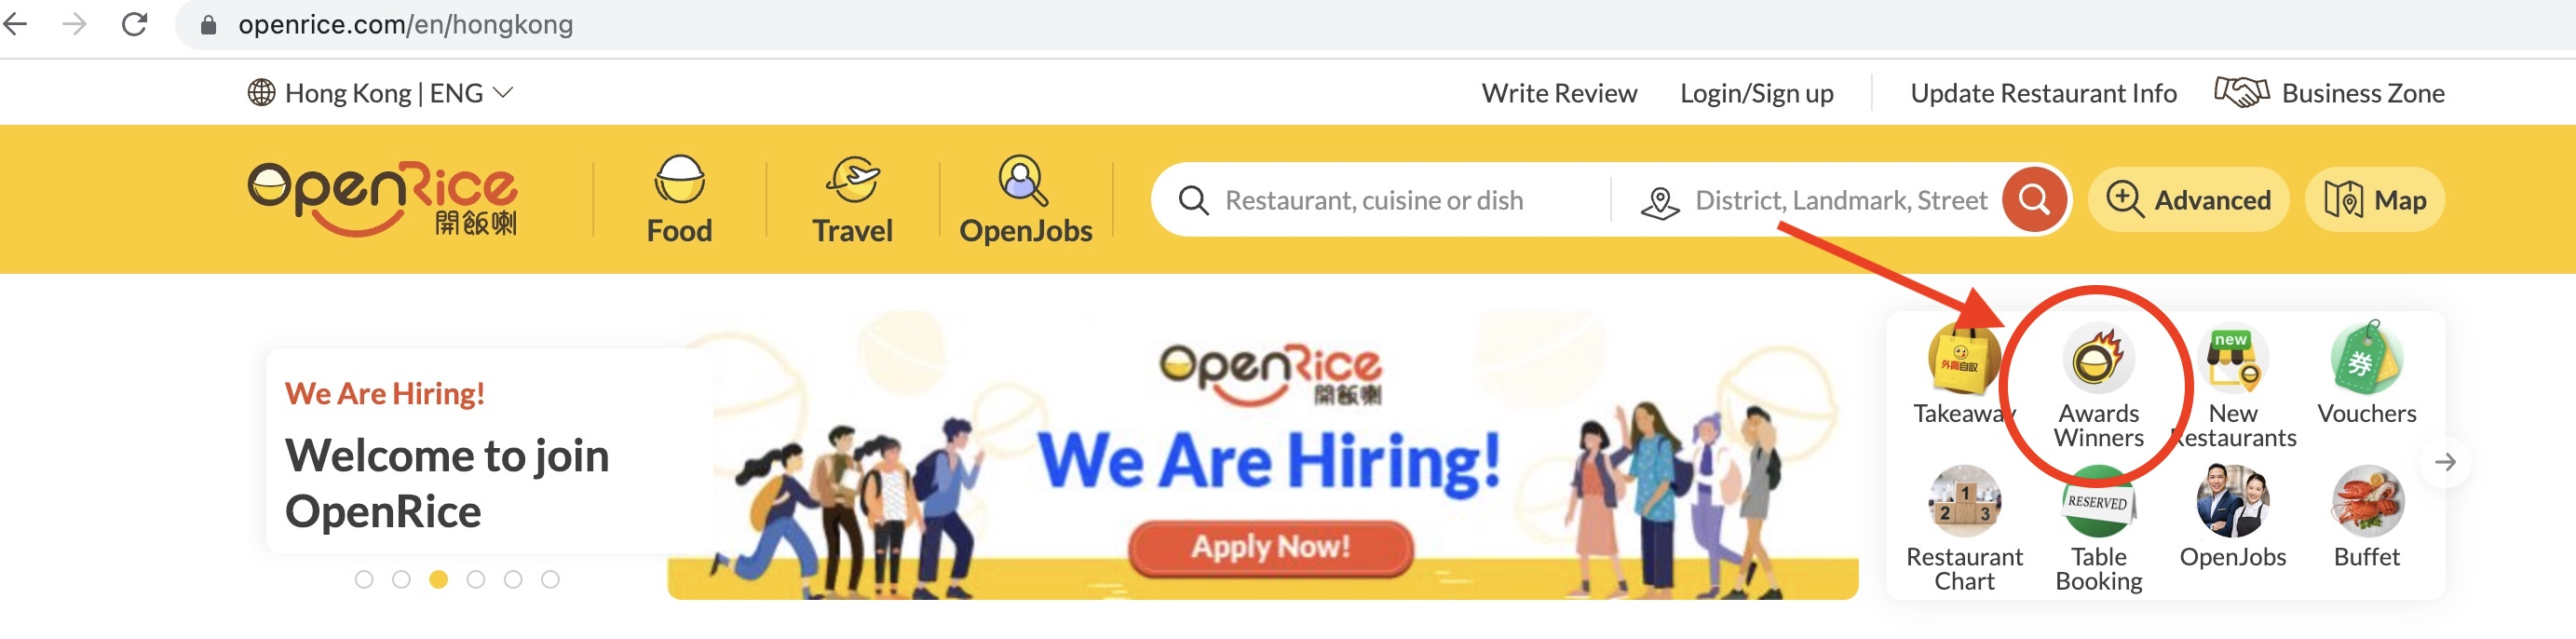

In [72]:
#Extract Rewardee of Japanese Restaurants
b=1
pages2=[]
for num in range(1, 3):
      print("Extracting page :"+str(num))
      url = "https://www.openrice.com/en/hongkong/restaurants/cuisine/japanese?award=10&page="+str(num)
      b=b+1
      print (url,b)
      pages2.append(extract_page(url))
#Combine the dataframes of all pages
Award_data = pd.concat(pages2, ignore_index=True)

Extracting page :1
https://www.openrice.com/en/hongkong/restaurants/cuisine/japanese?award=10&page=1 2
Status code: 200
Extracting page :2
https://www.openrice.com/en/hongkong/restaurants/cuisine/japanese?award=10&page=2 3
Status code: 200


In [73]:
Award_data

Title           Area  \
0                                 Nan Ei Sui San 南瀛水產  Tsim Sha Tsui   
1                             Tian Jian IZAKAYA 天澗居酒屋      Yuen Long   
2   Wagyu Yakiniku Ichiro (All Branches) 和牛燒肉一郎 (寶...                  
3                                            Poach 蟲二       Mong Kok   
4                                        Tea Brush 茶墨  Tsim Sha Tsui   
5                                 Yuki House Ramen 幸屋       Wan Chai   
6   Tsukiji Japanese Restaurant (Island Beverley) ...   Causeway Bay   
7                                   Isono Suisan 磯野水產   Causeway Bay   
8                                           J-City 丼瀛      Kwun Tong   
9                              Fukuoka Hambageu 福岡漢堡扒  Tsim Sha Tsui   
10                                   Lucky Ristorante       Mong Kok   
11                     Pancake House HoiHoi (Megabox)    Kowloon Bay   
12                                              Asa 朝  Prince Edward   
13                                          野川拉麵の深燒食堂      Yuen Long   
14                            Hungry Monkey (金朝陽中心二期)   Causeway Bay   
15                                             GAIJIN   Causeway Bay   
16                  Naruto Japanese Restaurant 鳴門割烹料理    Kowloon Bay   
17                                                友拉麵      Tsuen Wan   
18                            Tian Jian IZAKAYA 天澗居酒屋      Yuen Long   
19                                    N.28 Teppanyaki  Tsim Sha Tsui   
20                                  Ryou Dou Raku 漁道樂  Tsim Sha Tsui   
21                                               上戶酒場   Kowloon City   
22                                         Taisyou 大將  Tseung Kwan O   
23                                    Yume no don 夢の丼     To Kwa Wan   
24                          YAKINIKU KAKURA (黃埔天地聚寶坊)       Hung Hom   
25                                               Boon      Kwun Tong   
26                    Cocolo Tokyo Cake Factory (利東街)       Wan Chai   
27                                              天浮橋拉麵             元朗   
28  Manya Japanese Restaurant (Chung On Street) 滿屋...      Tsuen Wan   
29                                               FUMI        Central   
30                                              Gochi         Lok Fu   
31          Trinity (Li Yuen West Street) 三一餃子 (利源西街)        Central   
32  Gyuugoku Stone Grill Steak （Queen's Road East）...       Wan Chai   

                                             Location Bookmarks  \
0   5/F, Tern Plaza, 3A-3C Cameron Road, Tsim Sha ...     40498   
1                  G/F, 79&81 Kau Yuk Road, Yuen Long      2897   
2                                          3 branches             
3              Rooftop, 618 Shanghai Street, Mong Kok     40615   
4   Shop L411, 4/F, The ONE, 100 Nathan Road, Tsim...      9200   
5   G/F, Wai Cheong Building, 5-9A Gresson Street,...     16907   
6   Room R1, 7/F, Island Beverley, 1 Great George ...     20505   
7   19/F, Macau Yat Yuen Centre, 525 Hennessy Road...     28214   
8   Shop B, 1/F, COS Centre, 56 Tsun Yip Street, K...     18124   
9      Shop A, G/F, 11 Hau Fook Street, Tsim Sha Tsui     15800   
10      Shop 301B, 3/F, 618 Shanghai Street, Mong Kok     13625   
11  Shop 19-20, 1/F, Enterprise Square Five, Megab...      9456   
12              G/F, 39 Tai Nan Street, Prince Edward     11284   
13  Shop B, G/F,Wing Fung Building, 40-48 Yau San ...      9043   
14  Shop B, G/F, Midtown Soundwill Plaza II, 1 Tan...     18228   
15  9/F, Circle Tower, 28 Tang Lung Street, Causew...     15720   
16  shop 2, 2/F, Exchange Tower, 33 Wang Chiu Road...      9235   
17  Shop 53-54, 1/F, Cheong Ning Building, 202-216...      4065   
18                 G/F, 79&81 Kau Yuk Road, Yuen Long      2897   
19  G/F, Kam Wing Commercial Building, 28 Minden A...      1266   
20  Shop A, G/F, Kimberley House, 35 Kimberley Roa...     20437   
21  Shop A, G/F, Lung Cheung Court, 33-39 Lung Kon...      7789   
22  Shop F10, 1/F, PopCorn, 9 Tong Yin Street, Tse...     

In [74]:
# Save all restaurant data as csv and xlsx file
final_data.to_excel("japanese restaurant.xlsx")
final_data.to_csv("japanese restaurant.csv")

In [75]:
# Save awarded data as csv and xlsx file
Award_data.to_excel("Award restaurant.xlsx")
Award_data.to_csv("Award restaurant.csv")